In [6]:
library(arrow)
library(cowplot)
library(data.table)
library(dplyr)
library(finalfit)
library(ggplot2)
library(ggridges)
library(ggsci)
library(lubridate)
library(readxl)
library(stringr)
library(tidyverse)
library(viridis)
library(hrbrthemes)
theme_set(theme_bw(base_size = 16))
options(repr.plot.width = 15, repr.plot.height = 15)

NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

      if Arial Narrow is not on your system, please see https://bit.ly/arialnarrow



In [13]:
library(ggpubr)
library(rstatix)

ERROR: Error in library(ggpubr): there is no package called ‘ggpubr’


In [14]:
install.packages("ggpubr")


also installing the dependencies ‘RcppArmadillo’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsignif’, ‘polynom’, ‘rstatix’


Warning message in install.packages("ggpubr"):
“installation of package ‘RcppArmadillo’ had non-zero exit status”
Warning message in install.packages("ggpubr"):
“installation of package ‘SparseM’ had non-zero exit status”
Warning message in install.packages("ggpubr"):
“installation of package ‘conquer’ had non-zero exit status”
Warning message in install.packages("ggpubr"):
“installation of package ‘quantreg’ had non-zero exit status”
Warning message in install.packages("ggpubr"):
“installation of package ‘car’ had non-zero exit status”
Warning message in install.packages("ggpubr"):
“installation of package ‘rstatix’ had non-zero exit status”
Warning message in install.packages("ggpubr"):
“installation of package ‘ggpubr’ had non-zero exit status”


In [12]:
if(!require(devtools)) install.packages("devtools")
devtools::install_github("kassambara/ggpubr")

Loading required package: devtools

Loading required package: usethis




RcppArmad... (NA     -> 0.10.2.2.0) [CRAN]
openxlsx     (NA     -> 4.2.3     ) [CRAN]
data.table   (1.13.6 -> 1.14.0    ) [CRAN]
conquer      (NA     -> 1.0.2     ) [CRAN]
MatrixModels (NA     -> 0.5-0     ) [CRAN]
SparseM      (NA     -> 1.81      ) [CRAN]
sp           (NA     -> 1.4-5     ) [CRAN]
rio          (NA     -> 0.5.26    ) [CRAN]
maptools     (NA     -> 1.1-1     ) [CRAN]
quantreg     (NA     -> 5.85      ) [CRAN]
pbkrtest     (NA     -> 0.5.1     ) [CRAN]
abind        (NA     -> 1.4-5     ) [CRAN]
carData      (NA     -> 3.0-4     ) [CRAN]
car          (NA     -> 3.0-10    ) [CRAN]
corrplot     (NA     -> 0.84      ) [CRAN]
rstatix      (NA     -> 0.7.0     ) [CRAN]
polynom      (NA     -> 1.4-0     ) [CRAN]
ggsignif     (NA     -> 0.6.1     ) [CRAN]
ggrepel      (NA     -> 0.9.1     ) [CRAN]


Installing 19 packages: RcppArmadillo, openxlsx, data.table, conquer, MatrixModels, SparseM, sp, rio, maptools, quantreg, pbkrtest, abind, carData, car, corrplot, rstatix, polynom, ggsignif, ggrepel



ERROR: Error: Failed to install 'ggpubr' from GitHub:
  (converted from warning) installation of package ‘RcppArmadillo’ had non-zero exit status


Warning message:
“Ignoring unknown parameters: outlier.colour”
Warning message:
“Removed 2 rows containing non-finite values (stat_ydensity).”


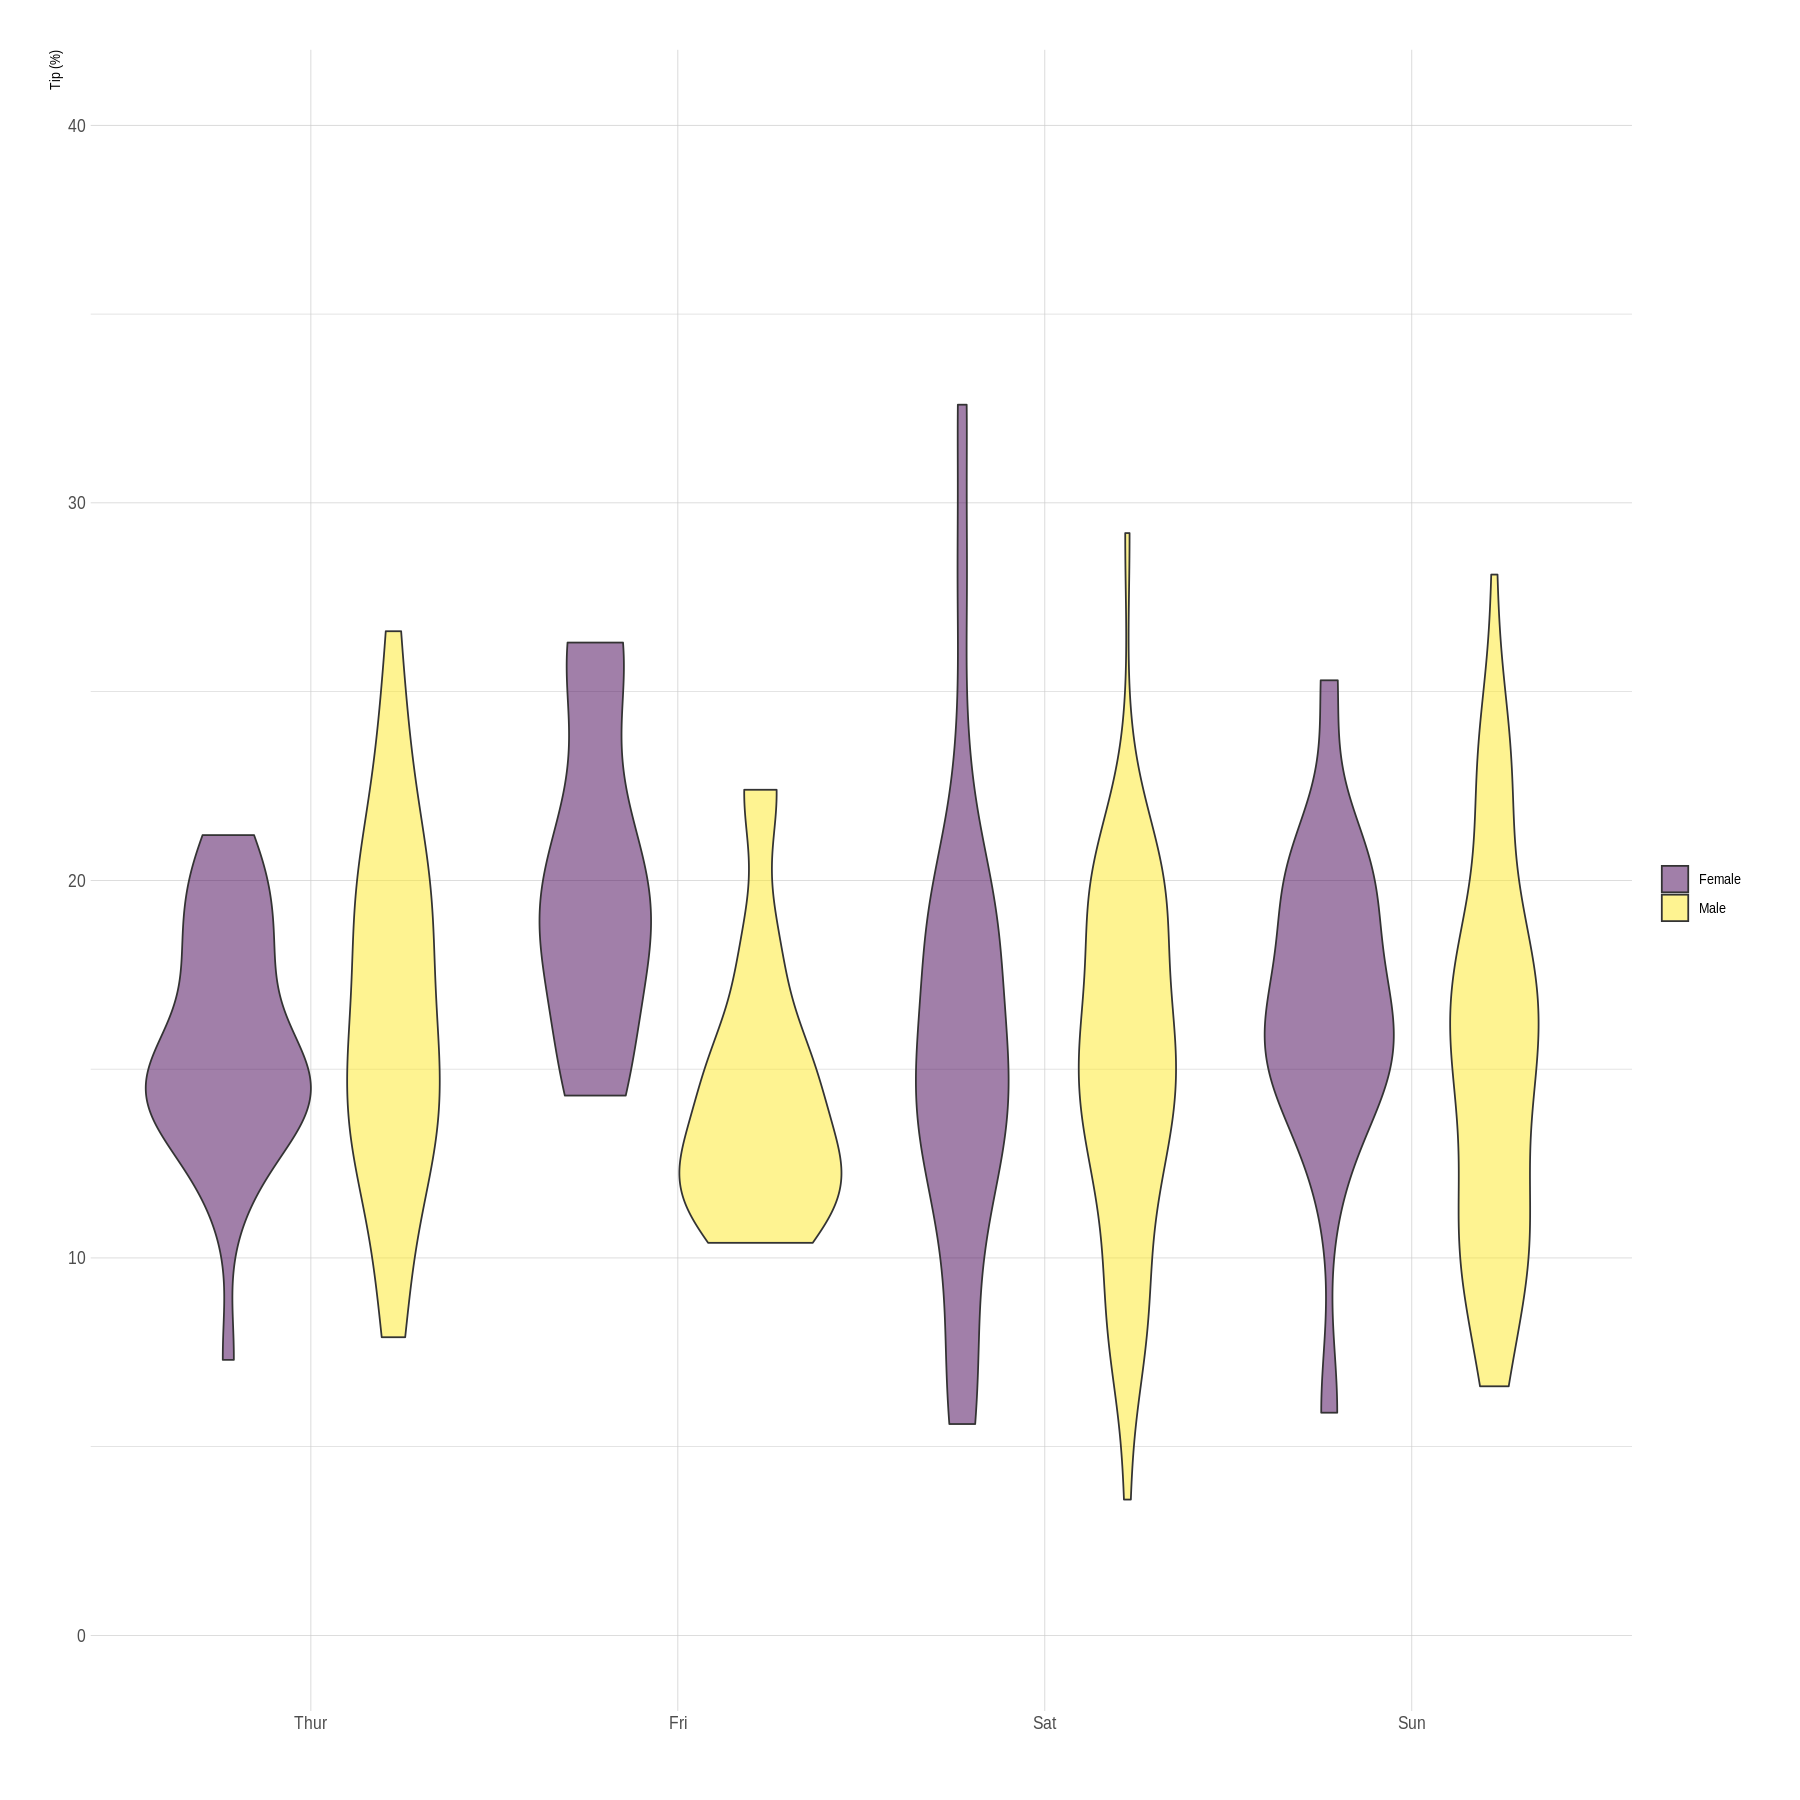

In [7]:
# Load dataset from github
data <- read.table("https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/10_OneNumSevCatSubgroupsSevObs.csv", header=T, sep=",") %>%
  mutate(tip = round(tip/total_bill*100, 1))
  
# Grouped
data %>%
  mutate(day = fct_reorder(day, tip)) %>%
  mutate(day = factor(day, levels=c("Thur", "Fri", "Sat", "Sun"))) %>%
  ggplot(aes(fill=sex, y=tip, x=day)) + 
    geom_violin(position="dodge", alpha=0.5, outlier.colour="transparent") +
    scale_fill_viridis(discrete=T, name="") +
    theme_ipsum()  +
    xlab("") +
    ylab("Tip (%)") +
    ylim(0,40)


Warning message:
“Ignoring unknown parameters: outlier.size”


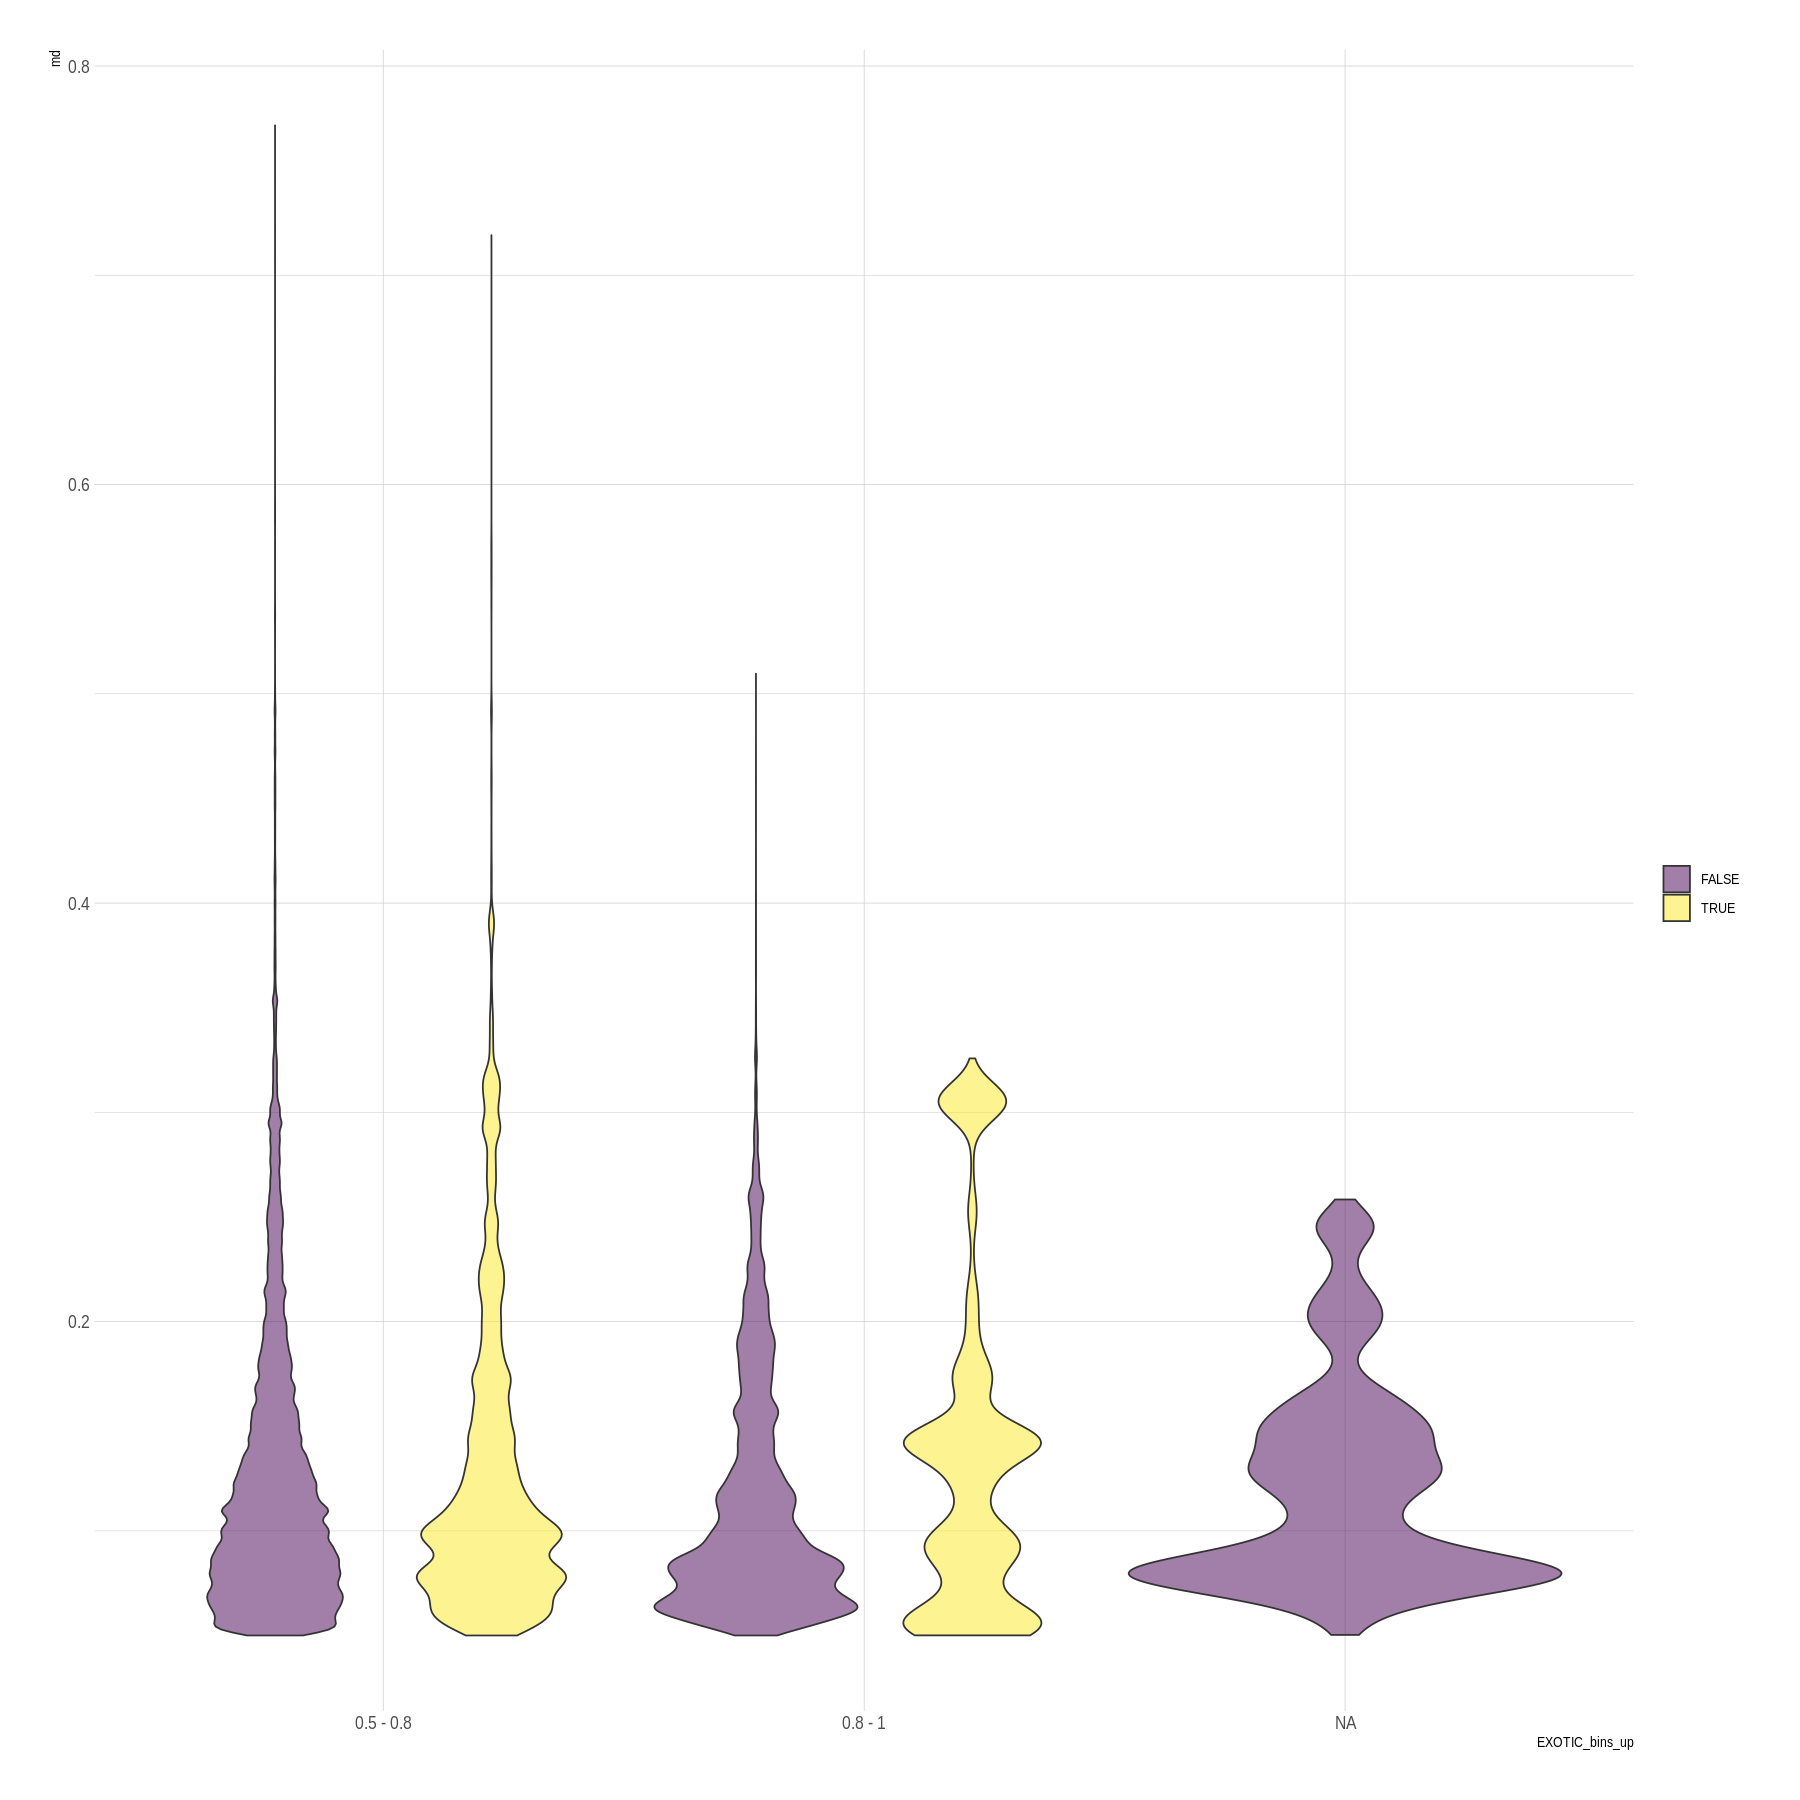

In [15]:
data <- read_parquet('/gstock/EXOTIC/data/QTL/violinplot_QTL.parquet')
# data
ggplot(data, aes(fill=Match_tissues, y=md, x=EXOTIC_bins_up)) + 
    geom_violin(position="dodge", alpha=0.5, outlier.size = -1) +
    scale_fill_viridis(discrete=T, name="") +
    theme_ipsum() 
#     xlab("") +
#     ylab("Tip (%)") +
#     ylim(0,40)